# AutoML with AutoGluon for Tabular Data

In [1]:
# get dataset
!wget https://github.com/mpolinowski/hotel-booking-dataset/raw/master/datasets/hotel_bookings.csv -P datase

--2023-06-22 11:49:24--  https://github.com/mpolinowski/hotel-booking-dataset/raw/master/datasets/hotel_bookings.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mpolinowski/hotel-booking-dataset/master/datasets/hotel_bookings.csv [following]
--2023-06-22 11:49:26--  https://raw.githubusercontent.com/mpolinowski/hotel-booking-dataset/master/datasets/hotel_bookings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16616819 (16M) [text/plain]
Saving to: ‘datase/hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  1

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
SEED = 42
MODEL_PATH = 'model'

## Data Preprocessing

In [3]:
data = TabularDataset('dataset/hotel_bookings.csv')
data.head(5).transpose()

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


|  | 0 | 1 | 2 | 3 | 4 |
| -- | -- | -- | -- | -- | -- |
| hotel | Resort Hotel | Resort Hotel | Resort Hotel | Resort Hotel | Resort Hotel |
| is_canceled | 0 | 0 | 0 | 0 | 0 |
| lead_time | 342 | 737 | 7 | 13 | 14 |
| arrival_date_year | 2015 | 2015 | 2015 | 2015 | 2015 |
| arrival_date_month | July | July | July | July | July |
| arrival_date_week_number | 27 | 27 | 27 | 27 | 27 |
| arrival_date_day_of_month | 1 | 1 | 1 | 1 | 1 |
| stays_in_weekend_nights | 0 | 0 | 0 | 0 | 0 |
| stays_in_week_nights | 0 | 0 | 1 | 1 | 2 |
| adults | 2 | 2 | 1 | 1 | 2 |
| children | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| babies | 0 | 0 | 0 | 0 | 0 |
| meal | BB | BB | BB | BB | BB |
| country | PRT | PRT | GBR | GBR | GBR |
| market_segment | Direct | Direct | Direct | Corporate | Online TA |
| distribution_channel | Direct | Direct | Direct | Corporate | TA/TO |
| is_repeated_guest | 0 | 0 | 0 | 0 | 0 |
| previous_cancellations | 0 | 0 | 0 | 0 | 0 |
| previous_bookings_not_canceled | 0 | 0 | 0 | 0 | 0 |
| reserved_room_type | C | C | A | A | A |
| assigned_room_type | C | C | C | A | A |
| booking_changes | 3 | 4 | 0 | 0 | 0 |
| deposit_type | No Deposit | No Deposit | No Deposit | No Deposit | No Deposit |
| agent | NaN | NaN | NaN | 304.0 | 240.0 |
| company | NaN | NaN | NaN | NaN | NaN |
| days_in_waiting_list | 0 | 0 | 0 | 0 | 0 |
| customer_type | Transient | Transient | Transient | Transient | Transient |
| adr | 0.0 | 0.0 | 75.0 | 75.0 | 98.0 |
| required_car_parking_spaces | 0 | 0 | 0 | 0 | 0 |
| total_of_special_requests | 0 | 0 | 0 | 0 | 1 |
| reservation_status | Check-Out | Check-Out | Check-Out | Check-Out | Check-Out |
| reservation_status_date | 01-07-15 | 01-07-15 | 02-07-15 | 02-07-15 | 03-07-15 |

In [9]:
# the are two columns for the lable is_canceled and reservation_status
# only keep one and make it the true label
data = data.drop(['is_canceled'], axis=1)
data = data.drop(['reservation_status_date'], axis=1)

In [10]:
data.info()
# <class 'autogluon.core.dataset.TabularDataset'>
# RangeIndex: 119390 entries, 0 to 119389
# Data columns (total 30 columns)

<class 'autogluon.core.dataset.TabularDataset'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  countr

In [12]:
# take small random sample to get started => 10%
data_sample = data.sample(frac=0.1 , random_state=SEED)
data_sample.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,11939.000000,10328.000000,653.000000,11939.000000,11939.000000,11939.000000,11939.000000
mean,104.857274,2016.155708,27.169696,15.830388,0.931234,2.506575,1.862551,0.105788,0.007455,0.030153,0.086607,0.135606,0.216266,87.062355,187.871363,2.304716,101.721405,0.058631,0.568306
std,106.874893,0.707376,13.665125,8.809565,0.990343,1.866822,0.684501,0.403473,0.118040,0.171016,0.834848,1.465395,0.647145,111.018109,130.579414,17.742465,47.643367,0.236365,0.798046
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,69.000000,0.000000,0.000000
50%,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.000000,0.000000,95.000000,0.000000,0.000000
75%,162.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,254.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.000000,31.000000,12.000000,30.000000,55.000000,3.000000,9.000000,1.000000,26.000000,56.000000,14.000000,531.000000,525.000000,391.000000,451.500000,3.000000,5.000000


|  | lead_time | arrival_date_year | arrival_date_week_number | arrival_date_day_of_month | stays_in_weekend_nights | stays_in_week_nights | adults | children | babies | is_repeated_guest | previous_cancellations | previous_bookings_not_canceled | booking_changes | agent | company | days_in_waiting_list | adr | required_car_parking_spaces | total_of_special_requests |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| count | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 10328.000000 | 653.000000 | 11939.000000 | 11939.000000 | 11939.000000 | 11939.000000 |
| mean | 104.857274 | 2016.155708 | 27.169696 | 15.830388 | 0.931234 | 2.506575 | 1.862551 | 0.105788 | 0.007455 | 0.030153 | 0.086607 | 0.135606 | 0.216266 | 87.062355 | 187.871363 | 2.304716 | 101.721405 | 0.058631 | 0.568306 |
| std | 106.874893 | 0.707376 | 13.665125 | 8.809565 | 0.990343 | 1.866822 | 0.684501 | 0.403473 | 0.118040 | 0.171016 | 0.834848 | 1.465395 | 0.647145 | 111.018109 | 130.579414 | 17.742465 | 47.643367 | 0.236365 | 0.798046 |
| min | 0.000000 | 2015.000000 | 1.000000 | 1.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 1.000000 | 9.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 |
| 25% | 19.000000 | 2016.000000 | 16.000000 | 8.000000 | 0.000000 | 1.000000 | 2.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 9.000000 | 67.000000 | 0.000000 | 69.000000 | 0.000000 | 0.000000 |
| 50% | 70.000000 | 2016.000000 | 27.000000 | 16.000000 | 1.000000 | 2.000000 | 2.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 14.000000 | 178.000000 | 0.000000 | 95.000000 | 0.000000 | 0.000000 |
| 75% | 162.000000 | 2017.000000 | 38.000000 | 24.000000 | 2.000000 | 3.000000 | 2.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 229.000000 | 254.000000 | 0.000000 | 126.000000 | 0.000000 | 1.000000 |
| max | 629.000000 | 2017.000000 | 53.000000 | 31.000000 | 12.000000 | 30.000000 | 55.000000 | 3.000000 | 9.000000 | 1.000000 | 26.000000 | 56.000000 | 14.000000 | 531.000000 | 525.000000 | 391.000000 | 451.500000 | 3.000000 | 5.000000 |

In [13]:
# train/test split
print(len(data_sample)*0.8)
# 9551.2
train_size = 9550
train_data = data_sample.sample(n=train_size, random_state=SEED)
test_data = data_sample.drop(train_data.index)
print(len(train_data), len(test_data))
# 9550 2389

9551.2
9550 2389


## Classification Model Training

In [14]:
# train a binary classification model on booking cancellation
predictor = TabularPredictor(label='reservation_status', path=MODEL_PATH)
predictor.fit(train_data)

# AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
# 3 unique label values:  ['Check-Out', 'Canceled', 'No-Show']
    
# AutoGluon training complete, total runtime = 56.25s ... Best model: "WeightedEnsemble_L2"

Beginning AutoGluon training ...
AutoGluon will save models to "model/"
AutoGluon Version:  0.8.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Tue May 30 23:14:35 UTC 2023
Disk Space Avail:   64.97 GB / 500.10 GB (13.0%)
Train Data Rows:    9550
Train Data Columns: 29
Label Column: reservation_status
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['Check-Out', 'Canceled', 'No-Show']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    23091.85 MB
	Train Data (Original)  Memory Usage: 7.45 MB (0.0% of avai

In [15]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.875393       0.047837  17.448067                0.000508           0.399006            2       True         14
1               XGBoost   0.874346       0.028096   3.322933                0.028096           3.322933            1       True         11
2         LightGBMLarge   0.869110       0.036332   4.947290                0.036332           4.947290            1       True         13
3              LightGBM   0.865969       0.037277   2.222120                0.037277           2.222120            1       True          5
4            LightGBMXT   0.863874       0.055051   2.591614                0.055051           2.591614            1       True          4
5      RandomForestGini   0.857592       0.061962   0.840476                0.061962           0.840476 

/home/xiaodie/.local/lib/python3.10/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6890052356020943,
  'KNeighborsDist': 0.7078534031413612,
  'NeuralNetFastAI': 0.8387434554973822,
  'LightGBMXT': 0.8638743455497382,
  'LightGBM': 0.8659685863874346,
  'RandomForestGini': 0.8575916230366493,
  'RandomForestEntr': 0.8544502617801047,
  'CatBoost': 0.856544502617801,
  'ExtraTreesGini': 0.8492146596858638,
  'ExtraTreesEntr': 0.8502617801047121,
  'XGBoost': 0.8743455497382199,
  'NeuralNetTorch': 0.8471204188481676,
  'LightGBMLarge': 0

Estimated performance of each model:

|   | model | score_val | pred_time_val  | fit_time | pred_time_val_marginal | fit_time_marginal | stack_level | can_infer | fit_order |
| --  | -- | -- | --  | -- | -- | -- | -- | -- | -- |
| 0 | WeightedEnsemble_L2 | 0.875393 | 0.047837 | 17.448067 | 0.000508 | 0.399006 | 2 | True | 14 |
| 1 | XGBoost | 0.874346 | 0.028096 | 3.322933 | 0.028096 | 3.322933 | 1 | True | 11 |
| 2 | LightGBMLarge | 0.869110 | 0.036332 | 4.947290 | 0.036332 | 4.947290 | 1 | True | 13 |
| 3 | LightGBM | 0.865969 | 0.037277 | 2.222120 | 0.037277 | 2.222120 | 1 | True | 5 |
| 4 | LightGBMXT | 0.863874 | 0.055051 | 2.591614 | 0.055051 | 2.591614 | 1 | True | 4 |
| 5 | RandomForestGini | 0.857592 | 0.061962 | 0.840476 | 0.061962 | 0.840476 | 1 | True | 6 |
| 6 | CatBoost | 0.856545 | 0.011194 | 14.661669 | 0.011194 | 14.661669 | 1 | True | 8 |
| 7 | RandomForestEntr | 0.854450 | 0.062001 | 0.905256 | 0.062001 | 0.905256 | 1 | True | 7 |
| 8 | ExtraTreesEntr | 0.850262 | 0.062787 | 0.729818 | 0.062787 | 0.729818 | 1 | True | 10 |
| 9 | ExtraTreesGini | 0.849215 | 0.063442 | 0.799020 | 0.063442 | 0.799020 | 1 | True | 9 |
| 10 | NeuralNetTorch | 0.847120 | 0.019233 | 13.726129 | 0.019233 | 13.726129 | 1 | True | 12 |
| 11 | NeuralNetFastAI | 0.838743 | 0.018830 | 7.619330 | 0.018830 | 7.619330 | 1 | True | 3 |
| 12 | KNeighborsDist | 0.707853 | 0.013923 | 0.007954 | 0.013923 | 0.007954 | 1 | True | 2 |
| 13 | KNeighborsUnif | 0.689005 | 0.034556 | 0.009681 | 0.034556 | 0.009681 | 1 | True | 1 |

Number of models trained: 14
Types of models trained:
{'XTModel', 'CatBoostModel', 'RFModel', 'TabularNeuralNetTorchModel', 'NNFastAiTabularModel', 'LGBModel', 'KNNModel', 'XGBoostModel', 'WeightedEnsembleModel'}

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.875393       0.047837  17.448067                0.000508           0.399006            2       True         14
1               XGBoost   0.874346       0.028096   3.322933                0.028096           3.322933            1       True         11
2         LightGBMLarge   0.869110       0.036332   4.947290                0.036332           4.947290            1       True         13
3              LightGBM   0.865969       0.037277   2.222120                0.037277           2.222120            1       True          5
4            LightGBMXT   0.863874       0.055051   2.591614                0.055051           2.591614            1       True          4
5      RandomForestGini   0.857592       0.061962   0.840476                0.061962           0.840476            1       True          6
6              CatBoost   0

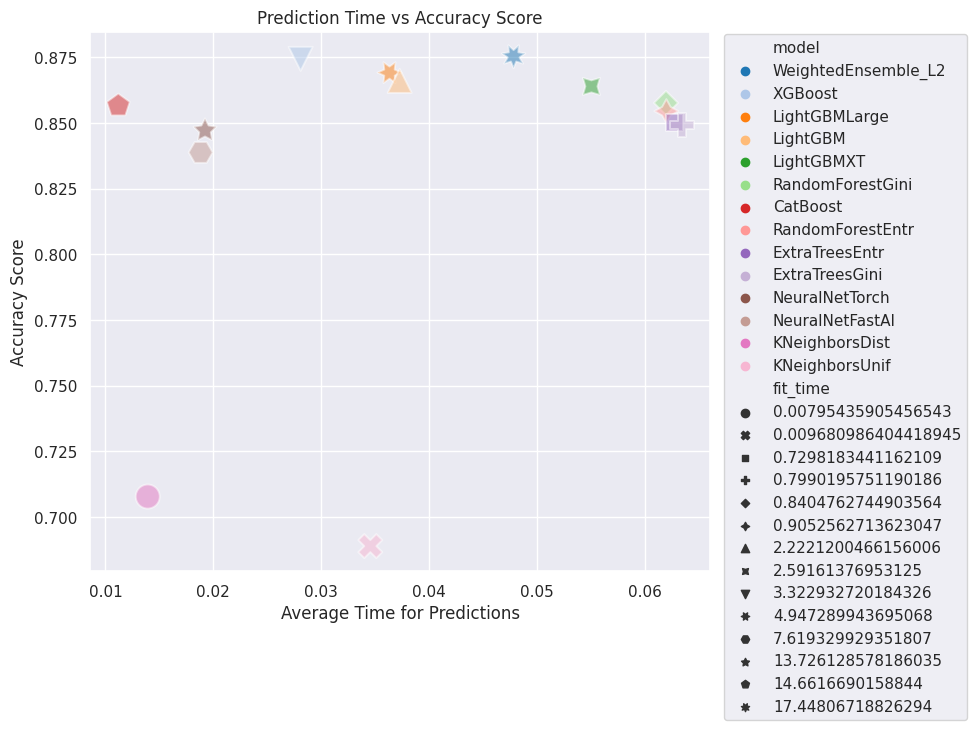

In [16]:
leaderboard=pd.DataFrame(predictor.leaderboard())

plt.figure(figsize=(8, 7))

sns.set(style='darkgrid')

sns.scatterplot(
    x='pred_time_val',
    y='score_val',
    data=leaderboard,
    s=300,
    alpha=0.5,
    hue='model',
    palette='tab20',
    style='fit_time'
)

plt.title('Prediction Time vs Accuracy Score')
plt.xlabel('Average Time for Predictions')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.01,1.01))

plt.savefig('assets/AutoML_with_AutoGluon_01.webp', bbox_inches='tight')

![AutoML with AutoGluon for Tabular Data](./assets/AutoML_with_AutoGluon_01.webp)

### Model Loading

In [12]:
# load best model
predictor = TabularPredictor.load("model/")

### Model Testing

In [18]:
X_test = test_data.drop(columns=['reservation_status'] )
y_test = test_data['reservation_status']

In [19]:
y_pred = predictor.predict(X_test)

In [20]:
eval_metrics = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8589367936375052
Evaluations on test data:
{
    "accuracy": 0.8589367936375052,
    "balanced_accuracy": 0.5913492727374766,
    "mcc": 0.6963459909206351
}


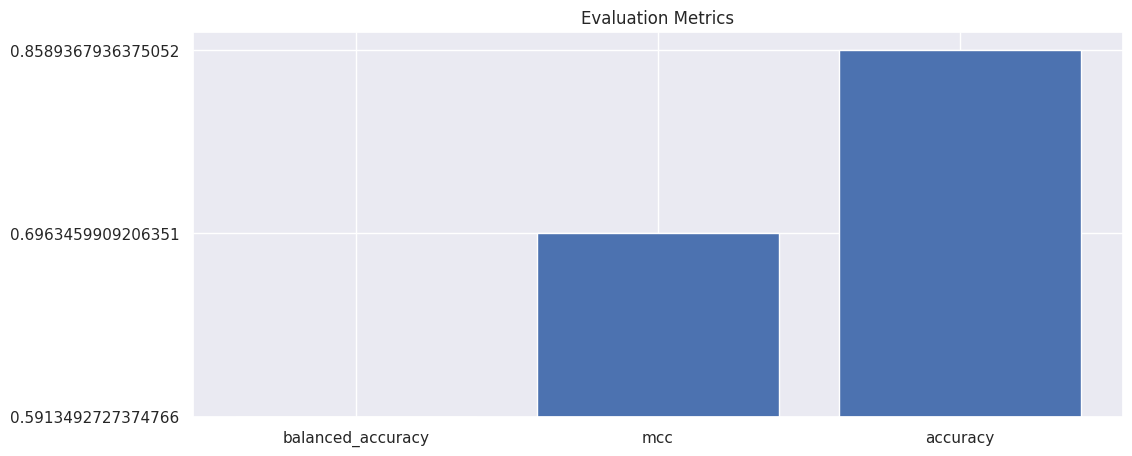

In [21]:
array = np.array(list(eval_metrics.items()))
df = pd.DataFrame(array, columns = ['metric','value']).sort_values(by='value')

plt.figure(figsize=(12,5))
plt.bar(df['metric'], df['value'])
plt.title('Evaluation Metrics')

plt.savefig('assets/AutoML_with_AutoGluon_02.webp', bbox_inches='tight')

![AutoML with AutoGluon for Tabular Data](./assets/AutoML_with_AutoGluon_02.webp)

### Feature Interpretability

Get feature importance by conducting a __Permutation-Shuffling__ test in AutoGluon. Shuffle one feature column, test how this effects prediction accuracy. The higher the effect the higher the features / columns importance. Negative effects show features that confuse the model, decrease the prediction accuracy and should be removed.

In [22]:
# add test dataset that must include the classifier (is_cancelled):
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 29 features using 2389 rows with 5 shuffle sets...
	21.28s	= Expected runtime (4.26s per shuffle set)
	11.02s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
country,0.061532,0.003076,7.468850e-07,5,0.067865,0.055199
deposit_type,0.058183,0.008815,6.133847e-05,5,0.076334,0.040033
total_of_special_requests,0.045626,0.006532,4.905663e-05,5,0.059075,0.032177
lead_time,0.038677,0.007045,1.264772e-04,5,0.053184,0.024171
agent,0.031394,0.003362,1.553978e-05,5,0.038316,0.024472
previous_cancellations,0.030222,0.002891,9.926338e-06,5,0.036174,0.024269
assigned_room_type,0.029217,0.003010,1.332357e-05,5,0.035414,0.023020
market_segment,0.028213,0.005106,1.233146e-04,5,0.038726,0.017699
reserved_room_type,0.023022,0.002529,1.719338e-05,5,0.028229,0.017815
required_car_parking_spaces,0.011469,0.001909,8.880361e-05,5,0.015400,0.007538


|  | importance | stddev | p_value | n | p99_high | p99_low |
| -- | -- | -- | -- | -- | -- | -- |
| country | 0.061532 | 0.003076 | 7.468850e-07 | 5 | 0.067865 | 0.055199 |
| deposit_type | 0.058183 | 0.008815 | 6.133847e-05 | 5 | 0.076334 | 0.040033 |
| total_of_special_requests | 0.045626 | 0.006532 | 4.905663e-05 | 5 | 0.059075 | 0.032177 |
| lead_time | 0.038677 | 0.007045 | 1.264772e-04 | 5 | 0.053184 | 0.024171 |
| agent | 0.031394 | 0.003362 | 1.553978e-05 | 5 | 0.038316 | 0.024472 |
| previous_cancellations | 0.030222 | 0.002891 | 9.926338e-06 | 5 | 0.036174 | 0.024269 |
| assigned_room_type | 0.029217 | 0.003010 | 1.332357e-05 | 5 | 0.035414 | 0.023020 |
| market_segment | 0.028213 | 0.005106 | 1.233146e-04 | 5 | 0.038726 | 0.017699 |
| reserved_room_type | 0.023022 | 0.002529 | 1.719338e-05 | 5 | 0.028229 | 0.017815 |
| required_car_parking_spaces | 0.011469 | 0.001909 | 8.880361e-05 | 5 | 0.015400 | 0.007538 |
| customer_type | 0.010130 | 0.003593 | 1.619134e-03 | 5 | 0.017529 | 0.002731 |
| arrival_date_year | 0.007032 | 0.002703 | 2.173517e-03 | 5 | 0.012598 | 0.001467 |
| booking_changes | 0.006195 | 0.001711 | 6.319167e-04 | 5 | 0.009717 | 0.002673 |
| adr | 0.004604 | 0.002476 | 7.086297e-03 | 5 | 0.009703 | -0.000494 |
| previous_bookings_not_canceled | 0.003767 | 0.001751 | 4.290459e-03 | 5 | 0.007373 | 0.000162 |
| company | 0.003684 | 0.001761 | 4.733895e-03 | 5 | 0.007310 | 0.000058 |
| children | 0.003014 | 0.000546 | 1.235932e-04 | 5 | 0.004138 | 0.001890 |
| arrival_date_week_number | 0.002260 | 0.002706 | 6.760071e-02 | 5 | 0.007833 | -0.003312 |
| meal | 0.001005 | 0.001008 | 4.488794e-02 | 5 | 0.003080 | -0.001071 |
| stays_in_weekend_nights | 0.000921 | 0.001659 | 1.411190e-01 | 5 | 0.004336 | -0.002494 |
| arrival_date_month | 0.000670 | 0.001555 | 1.950213e-01 | 5 | 0.003871 | -0.002532 |
| is_repeated_guest | 0.000419 | 0.001184 | 2.367137e-01 | 5 | 0.002856 | -0.002019 |
| distribution_channel | 0.000335 | 0.001042 | 2.561126e-01 | 5 | 0.002481 | -0.001811 |
| days_in_waiting_list | -0.000335 | 0.000350 | 9.503497e-01 | 5 | 0.000386 | -0.001056 |
| babies | -0.000335 | 0.000459 | 9.110961e-01 | 5 | 0.000609 | -0.001279 |
| adults | -0.000753 | 0.002163 | 7.602366e-01 | 5 | 0.003700 | -0.005207 |
| stays_in_week_nights | -0.001005 | 0.002939 | 7.563611e-01 | 5 | 0.005047 | -0.007056 |
| arrival_date_day_of_month | -0.001005 | 0.002397 | 7.991062e-01 | 5 | 0.003931 | -0.005941 |
| hotel | -0.001088 | 0.002147 | 8.398613e-01 | 5 | 0.003332 | -0.005508 |

In [23]:
importance_df = predictor.feature_importance(test_data).reset_index()

Computing feature importance via permutation shuffling for 29 features using 2389 rows with 5 shuffle sets...
	24.99s	= Expected runtime (5.0s per shuffle set)
	11.22s	= Actual runtime (Completed 5 of 5 shuffle sets)


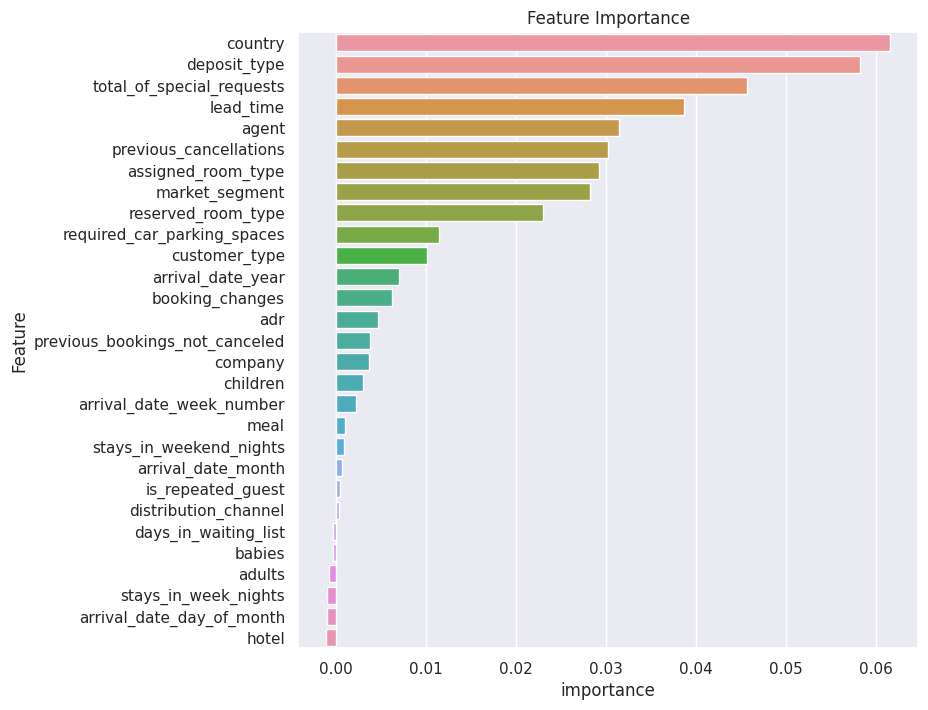

In [28]:
plt.figure(figsize=(8,8))
plt.title('Feature Importance')
sns.set(style='darkgrid')
sns.barplot(
    data=importance_df,
    y='index',
    x='importance',
    orient='horizontal'
).set_ylabel('Feature')

plt.savefig('assets/AutoML_with_AutoGluon_03.webp', bbox_inches='tight')

![AutoML with AutoGluon for Tabular Data](./assets/AutoML_with_AutoGluon_03.webp)

## Running Predictions

In [29]:
test_booking = {
  "hotel": "City Hotel",
  "is_canceled": 0,
  "lead_time": 214,
  "arrival_date_year": 2017,
  "arrival_date_month": "June",
  "arrival_date_week_number": 23,
  "arrival_date_day_of_month": 9,
  "stays_in_weekend_nights": 1,
  "stays_in_week_nights": 2,
  "adults": 2,
  "children": 0,
  "babies": 0,
  "meal": "BB",
  "country": "GBR",
  "market_segment": "Groups",
  "distribution_channel": "Direct",
  "is_repeated_guest": 0,
  "previous_cancellations": 0,
  "previous_bookings_not_canceled": 0,
  "reserved_room_type": "D",
  "assigned_room_type": "D",
  "booking_changes": 1,
  "deposit_type": "No Deposit",
  "agent": 28,
  "company": 153,
  "days_in_waiting_list": 0,
  "customer_type": "Transient",
  "adr": 118.13,
  "required_car_parking_spaces": 0,
  "total_of_special_requests": 0,
  "reservation_status": "Check-Out",
  "reservation_status_date": "12-06-17"
}

In [30]:
# load booking into dataset
test_booking_df = TabularDataset.from_dict([test_booking])
test_booking_from_csv_df = TabularDataset('dataset/test_booking.csv')

Loaded data from: dataset/test_booking.csv | Columns = 31 / 31 | Rows = 1 -> 1


In [31]:
predictor.predict(test_booking_df)
# 0    Check-Out <- not cancelled
# Name: is_canceled, dtype: int64

0    Check-Out
Name: reservation_status, dtype: object

In [32]:
predictor.predict(test_booking_from_csv_df)
# 0    Check-Out <- not cancelled
# Name: is_canceled, dtype: int64

0    Check-Out
Name: reservation_status, dtype: object